**Introduction  : Basic CNN**

* Used a basic convolution neureul network with 5 layers at first ,fitting to the model all the dataset , but I think with less data ,CNN is more efficient in order to avoid overfitting 

**techniques to avoid overfitting :**
1.     **Data augmenatation using GANS** (should canceling the flags of the horizoontal and rotation to avoid the confusion between 9 and 6 for example )
1.     **Dropout** 
1.     **transfer learning** with different options online , offline 

   



In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


# Importing Libraries

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from keras.optimizers import RMSprop

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Familiarizing with data 

In [4]:
data=pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
data.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [6]:
data.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


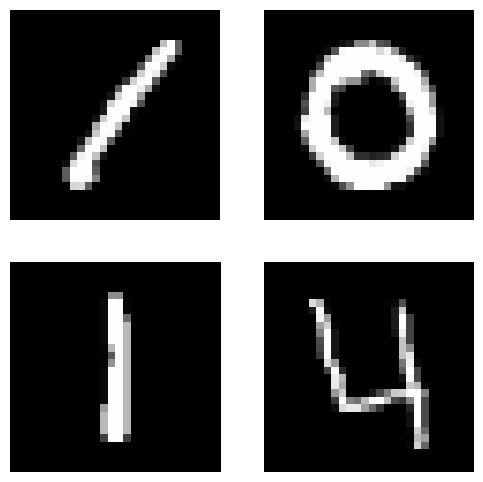

In [7]:

# Visualize the image using Matplotlib
plt.figure(figsize=(6, 6))
for i in range (4):
    img = data.iloc[i].values[1:].reshape(28,28)
    plt.subplot(2, 2, i + 1)
    # Visualize the reshaped grayscale image using Matplotlib
    plt.imshow(img, cmap='gray')  # Use 'gray' colormap for grayscale images
    plt.axis('off')  # Turn off axis for better visualization
plt.show()


**#verify missing data**

In [8]:

data.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

# Building our network using CNN alogorithm (basics)

In [9]:
from tensorflow.keras import layers
from tensorflow.keras import models


model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28,1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

# Processing the data

**cuz of CNN (it prefers to use less data )so we take only 1000 samples for each digital number
for training data and 500 for each category for validation data**




In [11]:
from sklearn.utils import shuffle
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

y=data['label']
X=data.drop('label',axis=1)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=2)

#reshape the data to fit in the model as size of input 28*28**

X_train = X_train.values.reshape(-1,28,28,1)
X_val = X_val.values.reshape(-1,28,28,1)

#scaling 
X_train=X_train/255.0
X_val=X_val/255.0

y_train=to_categorical(y_train)
y_val=to_categorical(y_val)



model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit_generator(
    generator=train_generator,
    steps_per_epoch=len(train_data_images) // batch_size,  # Number of batches per epoch
    epochs=50,
    validation_data=valid_generator,
    validation_steps=len(test_data_images) // batch_size,  # Number of batches for validation
    verbose=1
)

#using sklearn to split the data for validation and training data 
from sklearn.model_selection import train_test_split

label=data['label']
data=data.drop('label', axis=1)
train_data, validation_data, train_labels, validation_labels = train_test_split(data, label, test_size=0.2, random_state=42)

print(validation_data.shape)
train_data.shape

In [12]:
from keras.callbacks import ReduceLROnPlateau

#compile the model 
model.compile(optimizer=RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
# Create an instance of the ImageDataGenerator class with desired augmentations
datagen = ImageDataGenerator()
       # Strategy for filling in newly created pixels)

'''learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)'''
batch_size=100
epochs=2
# Apply data augmentation to the dataset
augmented_data_generator = datagen.flow(X_train, y_train, batch_size=batch_size)

# Train your model using augmented data/
history=model.fit_generator(augmented_data_generator, steps_per_epoch=X_train.shape[0] // batch_size, 
                            epochs=epochs,validation_data=(X_val, y_val),verbose=2)


Epoch 1/2


/opt/conda/lib/python3.10/site-packages/keras/optimizers/legacy/rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
/tmp/ipykernel_20/3176618919.py:22: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(augmented_data_generator, steps_per_epoch=X_train.shape[0] // batch_size,


336/336 - 17s - loss: 0.2961 - accuracy: 0.9063 - val_loss: 0.0934 - val_accuracy: 0.9713 - 17s/epoch - 50ms/step
Epoch 2/2
336/336 - 16s - loss: 0.0732 - accuracy: 0.9765 - val_loss: 0.0638 - val_accuracy: 0.9810 - 16s/epoch - 47ms/step


In [13]:
import joblib
joblib.dump(model, 'model.pkl')

['model.pkl']

# Evaluation of the performance

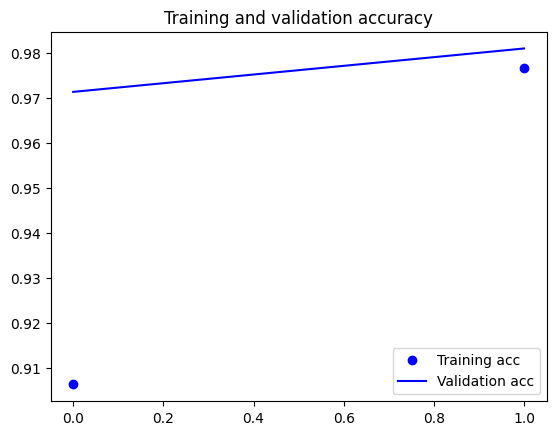

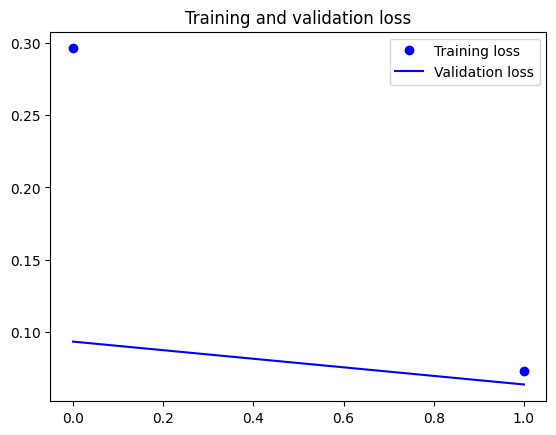

In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# avoiding overfiiitng 

* **dropout**


In [15]:



model = models.Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

model.compile(optimizer=RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        832       
                                                                 
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        25632     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 conv2d_6 (Conv2D)           (None, 14, 14, 64)        36928     
                                                      

In [17]:
from keras.callbacks import ReduceLROnPlateau

#compile the model 
model.compile(optimizer=RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
# Create an instance of the ImageDataGenerator class with desired augmentations
datagen = ImageDataGenerator()
       # Strategy for filling in newly created pixels)

'''learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)'''
batch_size=100
epochs=2
# Apply data augmentation to the dataset
augmented_data_generator = datagen.flow(X_train, y_train, batch_size=batch_size)

# Train your model using augmented data/
history=model.fit_generator(augmented_data_generator, steps_per_epoch=X_train.shape[0] // batch_size, 
                            epochs=epochs,validation_data=(X_val, y_val),verbose=2)


Epoch 1/2


/tmp/ipykernel_20/3176618919.py:22: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(augmented_data_generator, steps_per_epoch=X_train.shape[0] // batch_size,


336/336 - 135s - loss: 0.2745 - accuracy: 0.9123 - val_loss: 0.0663 - val_accuracy: 0.9808 - 135s/epoch - 402ms/step
Epoch 2/2
336/336 - 127s - loss: 0.0792 - accuracy: 0.9767 - val_loss: 0.0487 - val_accuracy: 0.9842 - 127s/epoch - 379ms/step


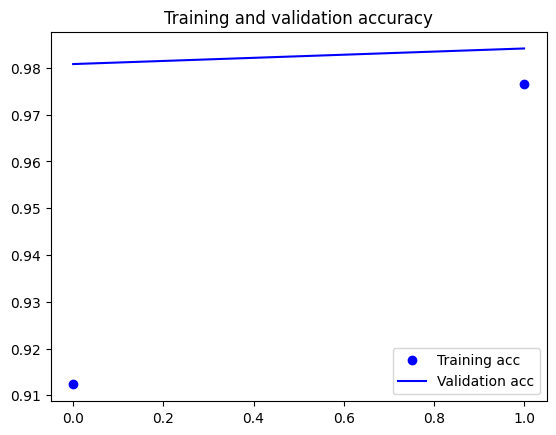

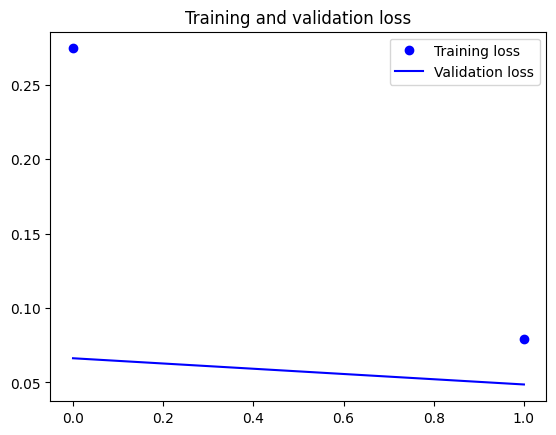

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

It can be more efficient if i used data augmentation 

In [19]:
joblib.dump(model,'model1.pks')

['model1.pks']

In [20]:
test=pd.read_csv('/kaggle/input/digit-recognizer/test.csv')
test_data = []
image_width=28
image_height=28
for i in range(len(test)):
    # Extract a single row (sample) from train_data
    single_sample = test.iloc[i].values
    # Reshape the row into a 2D array representing a 64x64 image
    image_2d = single_sample.reshape((image_width, image_height))
    # Add the channel dimension for grayscale image
    x_img = image_2d.reshape((image_width, image_height, 1))
    # Append the processed image to the list
    test_data.append(x_img)

# Convert the list of images to a numpy array
test_data = np.array(test_data)
submission=[]
for i in range(len(test_data)):
    x_img=test_data[i]
    x_img = x_img.reshape((1,) + x_img.shape)
    x_img=x_img/255
    print(i)
    predictions=model.predict(x_img)
    class_index = np.argmax(predictions)
    submission.append({'ImageId':i+1 ,'Label':class_index})

0
1/1 [==============================] - 0s 122ms/step
1
1/1 [==============================] - 0s 20ms/step
2
1/1 [==============================] - 0s 20ms/step
3
1/1 [==============================] - 0s 19ms/step
4
1/1 [==============================] - 0s 20ms/step
5
1/1 [==============================] - 0s 21ms/step
6
1/1 [==============================] - 0s 19ms/step
7
1/1 [==============================] - 0s 19ms/step
8
1/1 [==============================] - 0s 22ms/step
9
1/1 [==============================] - 0s 20ms/step
10
1/1 [==============================] - 0s 21ms/step
11
1/1 [==============================] - 0s 19ms/step
12
1/1 [==============================] - 0s 19ms/step
13
1/1 [==============================] - 0s 20ms/step
14
1/1 [==============================] - 0s 21ms/step
15
1/1 [==============================] - 0s 18ms/step
16
1/1 [==============================] - 0s 20ms/step
17
1/1 [==============================] - 0s 20ms/step
18
1/1 [===========

In [21]:
test

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
submission = pd.DataFrame(submission)
submission.to_csv('submission.csv', index=False)

In [23]:
submission

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9
